<a href="https://colab.research.google.com/github/gustavor10silva/IC-Redes-Neurais/blob/main/Chapter_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [78]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [114]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [54]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [55]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Coat


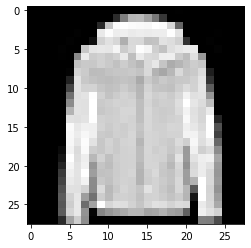

T-shirt/top


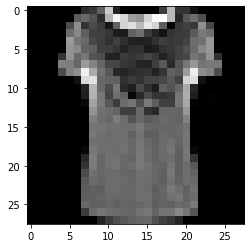

Sneaker


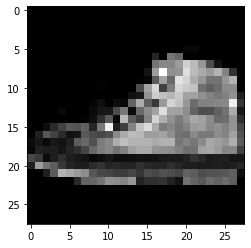

In [53]:
for i in range(3):
  fig = plt.figure
  plt.imshow(X_train[i], cmap='gray')
  print(class_names[y_train[i]])
  plt.show()

In [57]:
model = keras.models.Sequential() #creating the sequential model
model.add(keras.layers.Flatten(input_shape=[28, 28])) #input layer that receive X and computing 
model.add(keras.layers.Dense(300, activation="relu")) #first dense hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) #second dense hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) #output layer with softmax activation function and 10 neurons (one per class)

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.layers

In [96]:
model.layers[1].name

'dense'

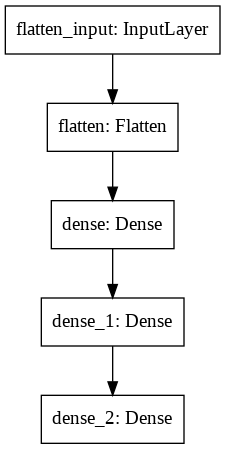

In [90]:
keras.utils.plot_model(model)

In [107]:
model.get_weights()

[array([[ 0.00716361,  0.05131811,  0.03060973, ..., -0.04791537,
         -0.05760796,  0.02841272],
        [ 0.03060159,  0.02980863, -0.06856228, ...,  0.02344871,
         -0.00879022,  0.00236864],
        [-0.05440698, -0.0307661 , -0.00726411, ..., -0.05804337,
          0.0464871 ,  0.05319008],
        ...,
        [ 0.04124693, -0.07141432,  0.01849286, ..., -0.06804959,
         -0.0516367 , -0.03740522],
        [-0.01973734, -0.04667714,  0.02986617, ..., -0.03824904,
         -0.0429172 , -0.02188049],
        [ 0.03007224, -0.06636152, -0.06523991, ..., -0.05801662,
         -0.01524998, -0.06899374]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [108]:
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

flatten
[]
dense
[array([[ 0.00716361,  0.05131811,  0.03060973, ..., -0.04791537,
        -0.05760796,  0.02841272],
       [ 0.03060159,  0.02980863, -0.06856228, ...,  0.02344871,
        -0.00879022,  0.00236864],
       [-0.05440698, -0.0307661 , -0.00726411, ..., -0.05804337,
         0.0464871 ,  0.05319008],
       ...,
       [ 0.04124693, -0.07141432,  0.01849286, ..., -0.06804959,
        -0.0516367 , -0.03740522],
       [-0.01973734, -0.04667714,  0.02986617, ..., -0.03824904,
        -0.0429172 , -0.02188049],
       [ 0.03007224, -0.06636152, -0.06523991, ..., -0.05801662,
        -0.01524998, -0.06899374]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [110]:
model.compile(loss="sparse_categorical_crossentropy", # because for each instance there's just a class and the classes are exclusive
optimizer="sgd",
metrics=["accuracy"])

In [115]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2224 - accuracy: 0.9206 - val_loss: 0.2971 - val_accuracy: 0.8934
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2190 - accuracy: 0.9210 - val_loss: 0.3076 - val_accuracy: 0.8916
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2149 - accuracy: 0.9235 - val_loss: 0.2936 - val_accuracy: 0.8932
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2115 - accuracy: 0.9239 - val_loss: 0.3079 - val_accuracy: 0.8922
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2084 - accuracy: 0.9252 - val_loss: 0.2947 - val_accuracy: 0.8968
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2046 - accuracy: 0.9264 - val_loss: 0.2994 - val_accuracy: 0.8944
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2012 - accuracy: 0.9274 - val_loss: 0.3237 - val_ac

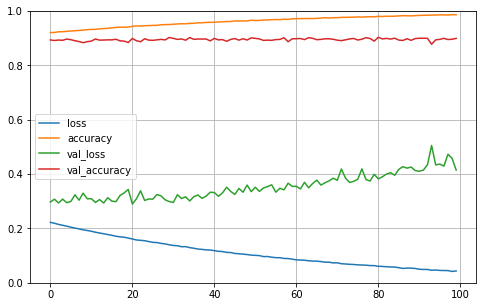

In [116]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [117]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 132.8674 - accuracy: 0.8410


[132.8673858642578, 0.8410000205039978]